# Lab: Pokémon Data Classification

## Objective
This notebook demonstrates how to classify Pokémon as legendary or not using two machine learning models:
- Logistic Regression
- Multi-Layer Perceptron (MLP)

We will compare the performance of both models using metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Step 1: Load and Explore the Dataset

In [203]:
# Your import 
import pandas as pd 


# Load the Pokémon dataset
pokemon_data =  pd.read_csv("pokemon.csv")

# Display the first few rows
pokemon_data.head(5)

,name,deck_no,attack,defense,sp_attack,sp_defense,speed,capture_rt,total_bs,type,gen,legendary
0,Bulbasaur,1,49,49,65,65,45,45,318,grass,1,0
1,Ivysaur,2,62,63,80,80,60,45,405,grass,1,0
2,Venusaur,3,100,123,122,120,80,45,625,grass,1,0
3,Charmander,4,52,43,60,50,65,45,309,fire,1,0
4,Charmeleon,5,64,58,80,65,80,45,405,fire,1,0


## Step 2: Data Preprocessing
### 2.1 Feature Engineering

### <span style="color:red">Please create a derived feature: sp_attack_to_sp_defense_ratio, Target is Legendary</span>. 

In [205]:
# Create a derived feature: sp_attack_to_sp_defense_ratio
pokemon_data["sp_attack_to_sp_defense_ratio"] = pokemon_data["sp_attack"] / pokemon_data["sp_defense"]

# your code
features = ["deck_no", "attack", "defense", "sp_attack", "sp_defense", 
            "speed", "capture_rt", "total_bs", "gen", "sp_attack_to_sp_defense_ratio"]
# Select all features + derived  
# target: Legendary 
target = "legendary"
#use lowercase for our legendary target

# Your code

X = pokemon_data[features] # Your code
y = pokemon_data[target] # Your code

#print(X.head())
#print(y.head())

### 2.2 Data Transformation Using ColumnTransformer

In [207]:
# Your import 
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
#need sklearn info 

# Categorical and numerical columns
# setup the categories we can qualify from our data
pokemon_data['name'] = pokemon_data['name'].astype('category')
pokemon_data['deck_no'] = pokemon_data['deck_no'].astype('category')
pokemon_data['type'] = pokemon_data['type'].astype('category')
pokemon_data['gen'] = pokemon_data['gen'].astype('category')
pokemon_data['legendary'] = pokemon_data['legendary'].astype('category')

# identify categorical and numerical columns
categorical_cols = pokemon_data.select_dtypes(include=['category']).columns.tolist()
numerical_cols = pokemon_data.select_dtypes(include=['number']).columns.tolist()

# preprocessing pipeline
num = StandardScaler()

#correcting the categories argument for OneHotEncoder
categories = [pokemon_data[col].unique() for col in categorical_cols]  #unique values for each categorical column
cat = OneHotEncoder(handle_unknown='ignore', categories=categories)

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num, numerical_cols),
        ('cat', cat, categorical_cols)
    ],
    remainder='passthrough'  # keep other columns as they are
)

# fit our data
pokemon_data_processed = preprocessor.fit_transform(pokemon_data)

#check the shape of the processed data
print(f"Shape of processed data: {pokemon_data_processed.shape}")  # should be 801, 1636!

# convert sparse matrix to dense format
pokemon_data_processed_dense = pokemon_data_processed.toarray()

# get all column names
all_columns = preprocessor.get_feature_names_out()

# number of columns in the processed data matches the number of feature names
#print(f"Number of columns: {len(all_columns)}")  #should match the shape

# convert back to DataFrame
pokemon_data_processed_df = pd.DataFrame(pokemon_data_processed_dense, columns=all_columns)

# print our processed data
#print(pokemon_data_processed_df.head())
preprocessor

Shape of processed data: (801, 1636)


ColumnTransformer(remainder='passthrough',
                  transformers=[('num', StandardScaler(),
                                 ['attack', 'defense', 'sp_attack',
                                  'sp_defense', 'speed', 'capture_rt',
                                  'total_bs',
                                  'sp_attack_to_sp_defense_ratio']),
                                ('cat',
                                 OneHotEncoder(categories=[['Bulbasaur', 'Ivysaur', 'Venusaur', 'Charmander', 'Charmeleon', ..., 'Celesteela', 'Kartana', 'Guzzlord', 'Necrozma', 'Magearna']
Length...
Categories (801, int64): [1, 2, 3, 4, ..., 798, 799, 800, 801],
                                                           ['grass', 'fire', 'water', 'bug', 'normal', ..., 'ice', 'dragon', 'dark', 'steel', 'flying']
Length: 18
Categories (18, object): ['bug', 'dark', 'dragon', 'electric', ..., 'psychic', 'rock', 'steel', 'water'],
                                                           [1, 2, 3, 4, 5, 6, 7]
Categories (7, int64): [1, 2, 3, 4, 5, 6, 7],
                                                           [0, 1]
Categories (2, int64): [0, 1]],
                                               handle_unknown='ignore'),
                                 ['name', 'deck_no', 'type', 'gen',
                                  'legendary'])])

### Prepare the training data

In [209]:
from sklearn.model_selection import train_test_split

# Transform the data
transformed = pokemon_data_processed_df
y = pokemon_data['legendary']#our target attribute

# Train-test split
X_train,X_temp, y_train, y_temp = train_test_split(transformed, y, test_size=0.3, random_state=42, stratify=y)
# Step 1: First train-test split to create training and temporary sets
# X_transformed: Preprocessed feature data
# y: Target labels
# test_size=0.3: Reserve 30% of the data for validation and test sets
# random_state=42: Ensures reproducibility of the splits
# stratify=y: Maintains the class distribution in the split


#Your code

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)



In [210]:
# Your import 
from sklearn.model_selection import train_test_split

# Please use train_test_split to prepare your data
# Your code

#Print your X_train and X_test
X_train[:2], X_test[:2]

(     num__attack  num__defense  num__sp_attack  num__sp_defense  num__speed  \
 78     -0.400068     -0.260447       -0.968214        -1.107009   -1.770013   
 246     0.191119     -0.097845       -0.195025        -0.032204   -0.525102   
 
      num__capture_rt  num__total_bs  num__sp_attack_to_sp_defense_ratio  \
 78          1.191305      -0.951715                           -0.138434   
 246        -0.709405      -0.154261                           -0.307650   
 
      cat__name_Bulbasaur  cat__name_Ivysaur  ...  cat__type_flying  \
 78                   0.0                0.0  ...               0.0   
 246                  0.0                0.0  ...               0.0   
 
      cat__gen_1  cat__gen_2  cat__gen_3  cat__gen_4  cat__gen_5  cat__gen_6  \
 78          1.0         0.0         0.0         0.0         0.0         0.0   
 246         0.0         1.0         0.0         0.0         0.0         0.0   
 
      cat__gen_7  cat__legendary_0  cat__legendary_1  
 78          0.0

## Step 3: Logistic Regression

In [212]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.metrics import accuracy_score

# Please build your Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000, random_state=42)



# Train Logistic Regression

logistic_model.fit(X_train, y_train)

#test model commented out for now -.-
#y_test_pred_logistic = logistic_model.predict(X_test)
#auc_test_logistic = roc_auc_score(y_test, y_test_pred_logistic)
#accuracy_test_logistic = accuracy_score(y_test, y_test_pred_logistic)
#print("Logistic Regression - Test Performance:")
#print(classification_report(y_test, y_test_pred_logistic))
#print(f"Test AUC: {auc_test_logistic:.4f}")
#print(f"Test Accuracy: {accuracy_test_logistic:.4f}")


y_val_pred_logistic = logistic_model.predict(X_val)  # predict on X_val
print(f"Length of y_test: {len(y_test)}")
print(f"Length of y_val_pred_logistic: {len(y_val_pred_logistic)}")

# Please use AUC and accuracy score to evaluate your model
# By trying different methods, your accuracy can reach over 90%.
auc_val_logistic = roc_auc_score(y_val, y_val_pred_logistic)
accuracy_val_logistic = accuracy_score(y_val, y_val_pred_logistic)
print("Cole Manchester + Logistic Regression - Validation Performance:")
print(classification_report(y_val, y_val_pred_logistic))
print(f"Validation AUC: {auc_val_logistic:.4f}")
print(f"Validation accuracy: {accuracy_score_logistic:.4f}")

Length of y_test: 121
Length of y_val_pred_logistic: 120
Cole Manchester + Logistic Regression - Validation Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        10

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Validation AUC: 1.0000
Validation accuracy: 0.9863


## Step 4: Multi-Layer Perceptron (MLP)

In [243]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
#just in case improt these too

# Please build your Multi-Layer Perceptron model
mlp_model = MLPClassifier(hidden_layer_sizes=(8,), activation='relu', max_iter=500, random_state=42)  # hidden layer size 8 and max iterations is 500
# Hidden layer: 8 weights and 4 biases, activation: relu, iteration : 500
# Your code
mlp_model.fit(X_train, y_train)
y_test_pred_mlp = mlp_model.predict(X_test)


# Please use AUC and accuracy score to evalue your model
# By trying different methods, your accuracy can reach over 90%.
# Your code


auc_test_mlp = roc_auc_score(y_test, y_test_pred_mlp)
accuracy_test_mlp = accuracy_score(y_test, y_test_pred_mlp)



# Train MLP Classifier
y_val_pred_mlp = mlp_model.predict(X_val)


# Evaluate MLP Classifier
auc_val_mlp = roc_auc_score(y_val, y_val_pred_mlp)

accuracy_score_mlp = accuracy_score(y_val, y_val_pred_mlp)   # validation score

print("Cole Manchester + MLP Classifier - Validation Performance:")
print(classification_report(y_val, y_val_pred_mlp))
print(f"Validation AUC: {auc_val_mlp:.4f}")
print(f"Validation accuracy: {accuracy_score_mlp:.4f}")

Cole Manchester + MLP Classifier - Validation Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00        10

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

Validation AUC: 1.0000
Validation accuracy: 1.0000


## Step 5: Comparison of Models - Training Loss Curve

### Manually record the loss of logistic regression

In [245]:
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Please record your loss of logistic regression with 500 iterations
# Your code
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
#test scaling too
logreg_model = LogisticRegression(solver='saga', max_iter=1000, warm_start=True, random_state=42) # higher if needed but 1000 max iterations
# Initialize the model with warm_start to fit incrementally

# To store the loss values
loss_curve = []

# Train the model incrementally
# Your code
for i in range(500): 
    logreg_model.fit(X_train_scaled, y_train)
    y_train_pred = logreg_model.predict_proba(X_train_scaled)
    loss_logreg = log_loss(y_train, y_train_pred)
    loss_curve.append(loss_logreg)




C:\Users\ColeM\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ColeM\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ColeM\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ColeM\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\ColeM\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_pe

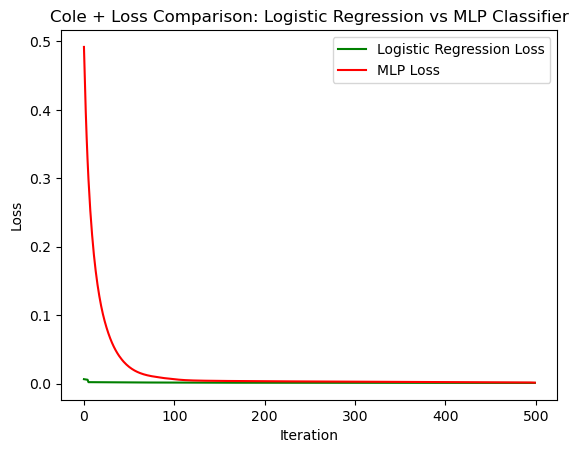

In [246]:
# Extract loss during MLP training
mlp_model = MLPClassifier(hidden_layer_sizes=(8,), activation='relu', max_iter=1, warm_start=True, random_state=42)
mlp_loss_curve = []
# Your code
for i in range(500):
    mlp_model.fit(X_train_scaled, y_train)  # fit for one iteration
    mlp_loss = mlp_model.loss_  # has the loss_ attribute that stores the loss at each iteration
    mlp_loss_curve.append(mlp_loss)  # store loss

plt.plot(loss_curve, label='Logistic Regression Loss', color='green')
plt.plot(mlp_loss_curve, label='MLP Loss', color='red')

# Plot the loss difference during MLP training and Logistic
# please set color of Logistic as green, set MLP as red.
# Your code

plt.title('Cole + Loss Comparison: Logistic Regression vs MLP Classifier')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.legend()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
# Plot ROC Curve Comparison
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_test_pred_logreg)
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)

#mlp ROC curve 
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_test_pred_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
# Plot ROC curves
# Your code 
plt.figure(figsize=(8, 6))  # change figure size for better visualization

plt.plot(fpr_logreg, tpr_logreg, color='green', lw=2, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_mlp, tpr_mlp, color='red', lw=2, label=f'MLP Classifier (AUC = {roc_auc_mlp:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # add a diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc="lower right")
plt.show()

# please set color of Logistic as green, set MLP as red.
# Your code 
 

In [ ]:
# Your idea:
#I couldn't get my model to converge and display the loss grahpics


## Step 6: Visualization of Predictions and Confusion Matrices

### 6.1 Actual vs Predicted Results

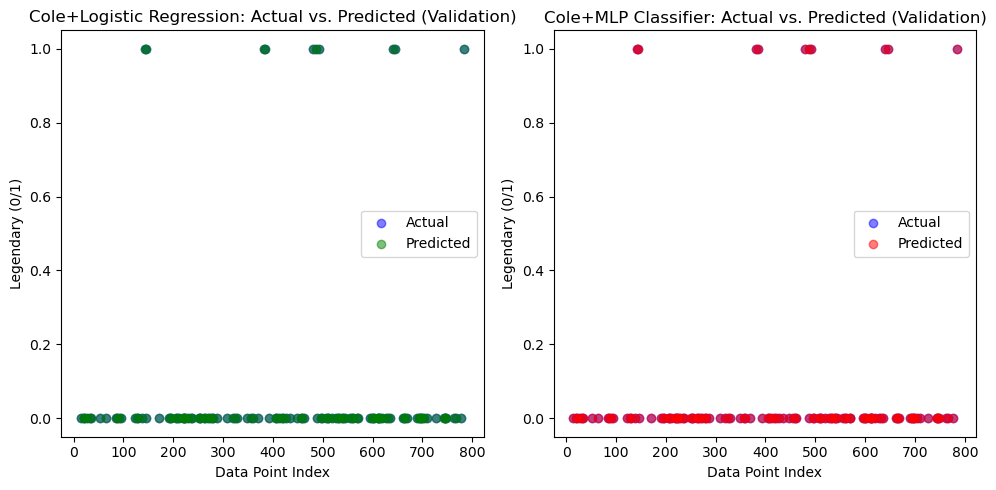

In [230]:
# Please plot the Actual data and Predicted for Logistic and MLP model
# Your code
plt.figure(figsize=(10, 5))  

plt.subplot(1, 2, 1)  # a subplot for logistic regression
plt.scatter(X_val.index, y_val, label='Actual', color='blue', alpha=0.5)  
plt.scatter(X_val.index, y_val_pred_logistic, label='Predicted', color='green', alpha=0.5)
plt.title('Cole+Logistic Regression: Actual vs. Predicted (Validation)')
plt.xlabel('Data Point Index')  
plt.ylabel('Legendary (0/1)')
plt.legend()


plt.subplot(1, 2, 2)  # a subplot for MLP
plt.scatter(X_val.index, y_val, label='Actual', color='blue', alpha=0.5)  
plt.scatter(X_val.index, y_val_pred_mlp, label='Predicted', color='red', alpha=0.5)
plt.title('Cole+MLP Classifier: Actual vs. Predicted (Validation)')
plt.xlabel('Data Point Index')  # 
plt.ylabel('Legendary (0/1)')
plt.legend()

plt.tight_layout() #fit scope
plt.show()



### Confusion Matrices

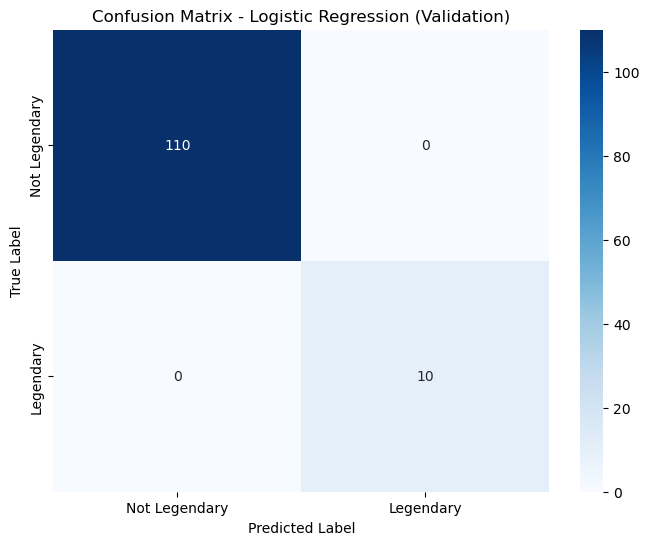

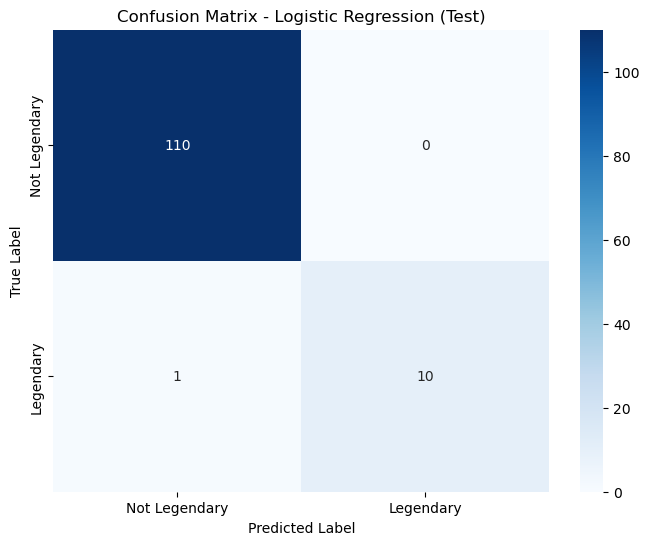

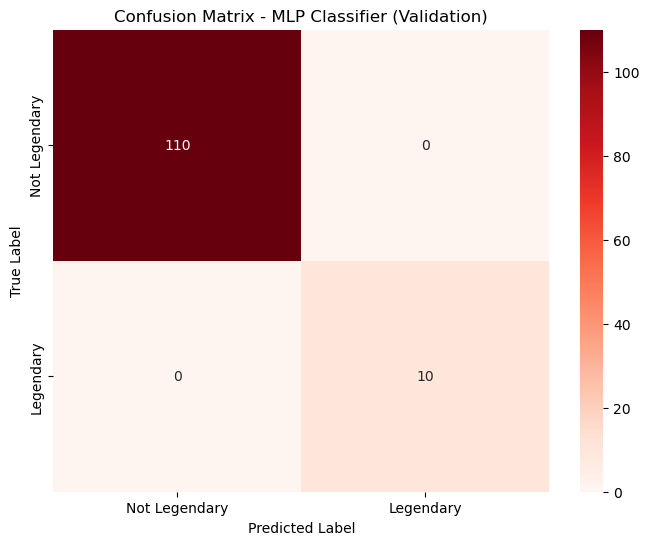

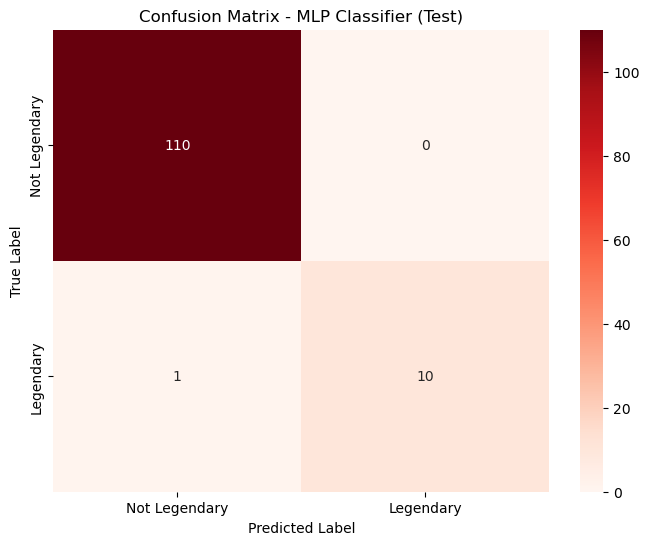

In [224]:
# plot Logistic Regression
from sklearn.metrics import confusion_matrix
import seaborn as sns
# Logistic Regression
y_test_pred_logistic = logistic_model.predict(X_test)  # use X_test!
cm_logreg_test = confusion_matrix(y_test, y_test_pred_logistic)  #  y_test and y_test_pred_logistic will match

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg_val, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Not Legendary", "Legendary"], 
            yticklabels=["Not Legendary", "Legendary"])
plt.title("Cole + Confusion Matrix - Logistic Regression (Validation)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Confusion Matrix - Logistic Regression test
cm_logreg_test = confusion_matrix(y_test, y_test_pred_logistic)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg_test, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Not Legendary", "Legendary"],
            yticklabels=["Not Legendary", "Legendary"])
plt.title("Cole + Confusion Matrix - Logistic Regression (Test)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


# Confusion Matrix - MLP Classifier real/validation set
cm_mlp_val = confusion_matrix(y_val, y_val_pred_mlp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp_val, annot=True, fmt="d", cmap="Reds",  # different color map for MLP
            xticklabels=["Not Legendary", "Legendary"],
            yticklabels=["Not Legendary", "Legendary"])
plt.title("Cole + Confusion Matrix - MLP Classifier (Validation)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion Matrix - MLP classifier which will use our fancy test set
cm_mlp_test = confusion_matrix(y_test, y_test_pred_mlp)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_mlp_test, annot=True, fmt="d", cmap="Reds",  # different color map for MLP
            xticklabels=["Not Legendary", "Legendary"],
            yticklabels=["Not Legendary", "Legendary"])
plt.title("Cole + Confusion Matrix - MLP Classifier (Test)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# your code

## Conclusion

In [ ]:
# Please compare the difference and common between Logistic results and MLP results
# Your idea : Seems that with this data set the prediction accuracy is quite hight with MLP and Logistic regression! Our data points to quite a few legendaries compared to regulars 110-10 which is what I am reading from our csv file correctly
